In [171]:
#//*** Load Libraries.
#//*** Install Pacman installer if not loaded
if (!require("pacman")) install.packages("pacman")

#//*** Load libraries with pacman.
#//*** Automatically installs libraries as needed.
p_load(ggplot2, ggthemes, dplyr, readr, scales, forcats, readxl, showtext, ggrepel, treemapify, RColorBrewer,viridis)

font_add("Tahoma","Tahoma.ttf")
font_add("XKCD","./fonts/xkcd-Regular.otf")
font_add("Roboto Condensed", "./fonts/RobotoCondensed-Regular.ttf")
#font_add("Decima Mono Pro","DecimaMonoPro.otf")
showtext_auto()

In [172]:
#tv_df = pd.read_csv("./wk0708/z_wk07_08_tv_sizes.txt",sep='\t')

tv_df <- read_delim("./wk0708/z_wk07_08_tv_sizes.txt", delim = "\t", col_types = c("int","int"))



Warning message:
"Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two."

png 
  2

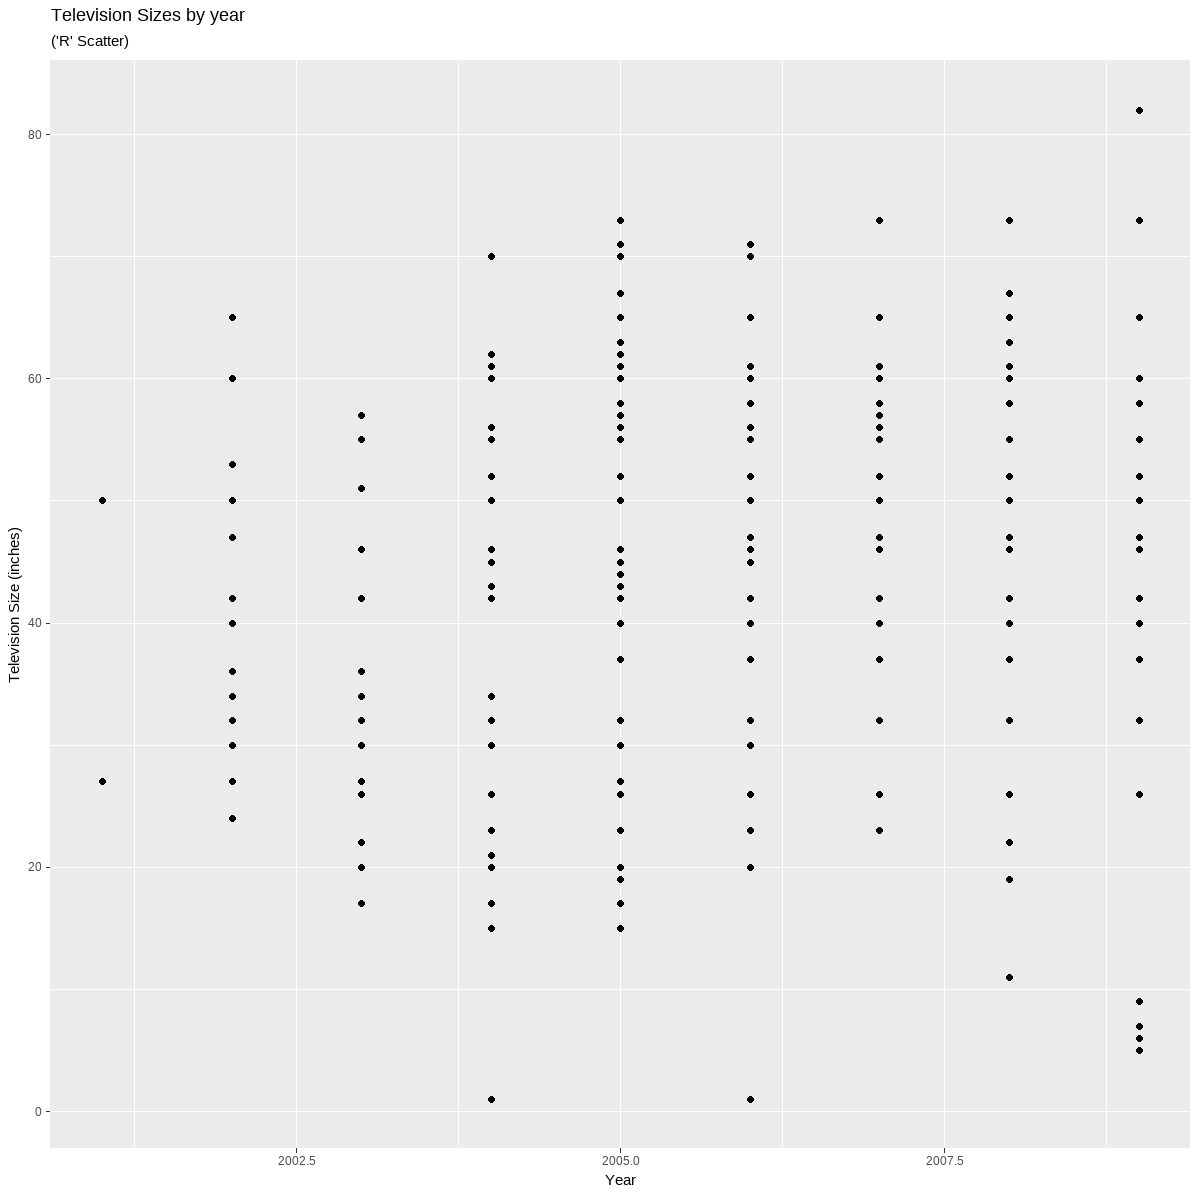

In [173]:
plot_df <- tv_df

plot_df <- tv_df[tv_df["size"] < max(tv_df["size"]),]
#plot_df['year'] <- as.numeric(plot_df['year'])

plot_df$year <- as.integer(plot_df$year)
plot_df$size <- as.integer(plot_df$size)

options(repr.plot.width = 10, repr.plot.height = 10)
p <- ggplot(plot_df,  aes(x=year, y=size)) +
    labs(
        title="Television Sizes by year",
        subtitle="('R' Scatter)",
        x="Year",
        y="Television Size (inches)",
        size=1.5
    )+ geom_point()
    
p

jpeg("output_wk07_07_r_scatter.jpg")

print(p)
dev.off()

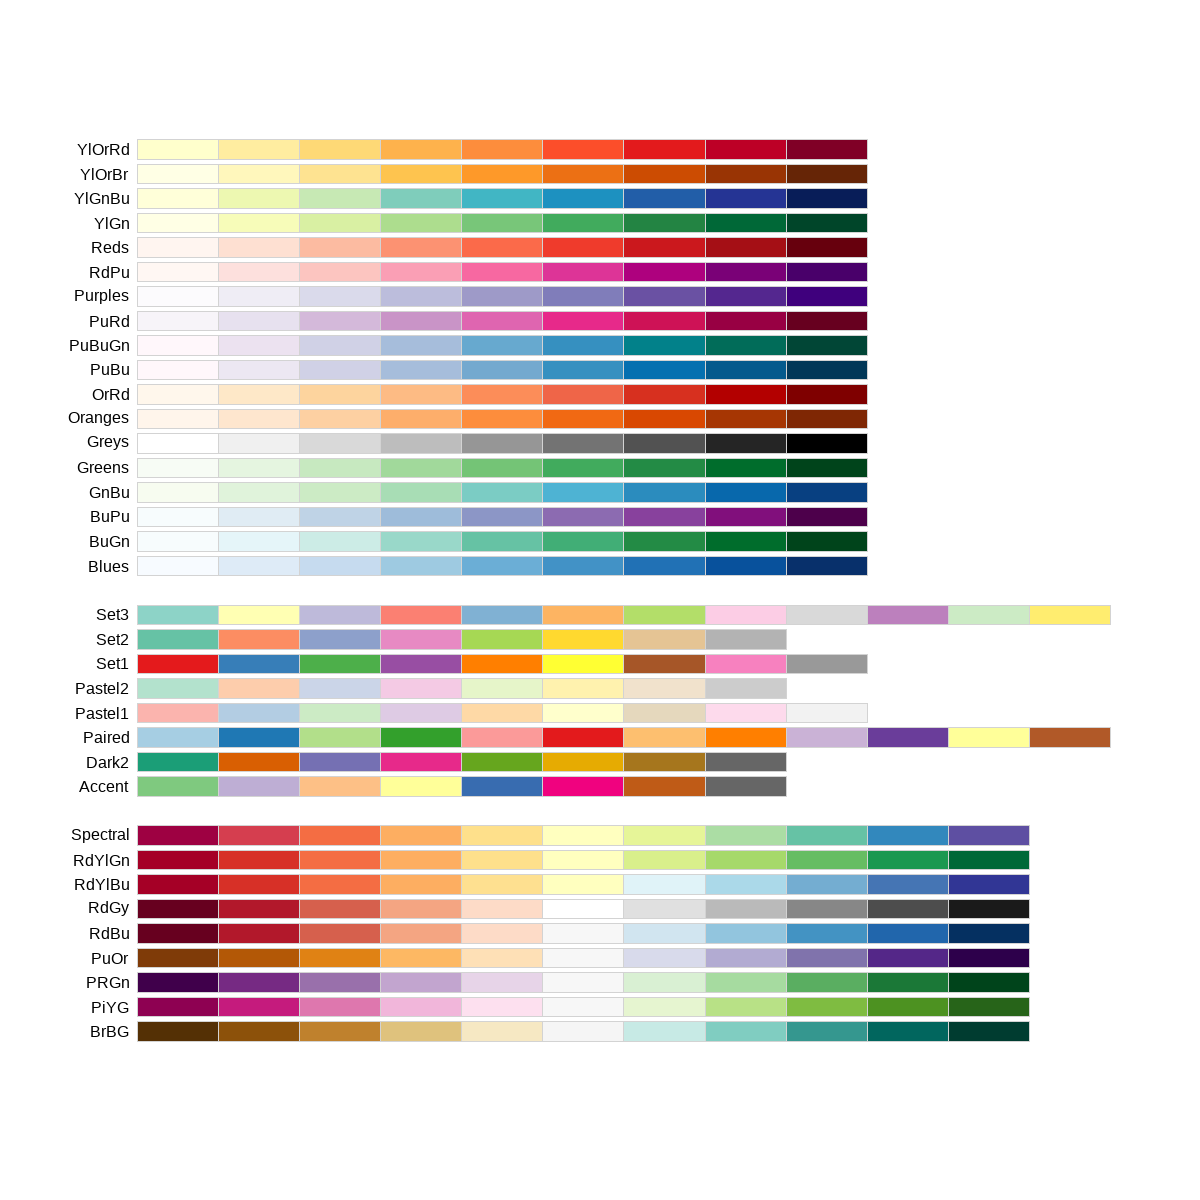

In [174]:
display.brewer.all()
#viridis()

Parsed with column specification:
cols(
  state = col_character(),
  murder = col_double(),
  forcible_rape = col_double(),
  robbery = col_double(),
  aggravated_assault = col_double(),
  burglary = col_double(),
  larceny_theft = col_double(),
  motor_vehicle_theft = col_double(),
  population = col_double()
)
Warning message:
"Using size for a discrete variable is not advised."Warning message:
"Using size for a discrete variable is not advised."

png 
  2

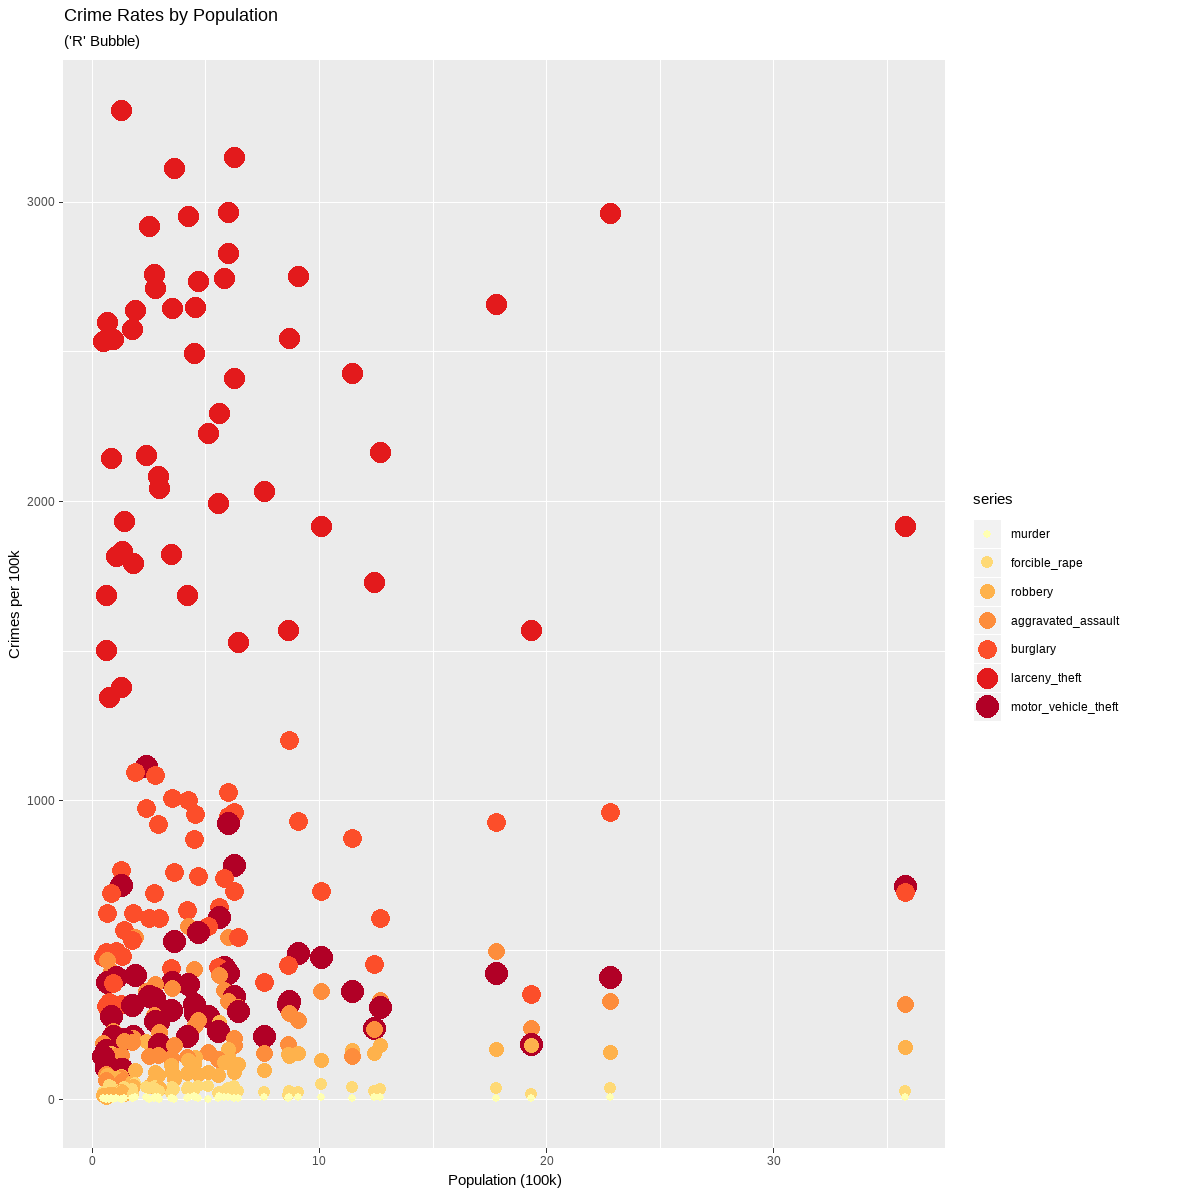

In [175]:
crbs_df <- read_csv("./wk0708/z_wk07_08_crimerates-by-state-2005.csv")
crbs_df <- crbs_df[crbs_df["state"] != "United States" & crbs_df["state"] != "District of Columbia",]


plot_df = crbs_df
plot_df['population'] = plot_df['population'] / 1000000

#melt data frame into long format
df <- melt(plot_df[2:9] ,  id.vars = 'population', variable.name = 'series')
df <- df[order(-df$value),]
#create line plot for each column in data frame
p <- ggplot(df, aes(population, value)) +
 scale_colour_brewer(palette = "YlOrRd") +
 geom_point(aes(colour = series, size=series)) +
 labs(
        title="Crime Rates by Population",
        subtitle="('R' Bubble)",
        x="Population (100k)",
        y="Crimes per 100k"
    )
p

jpeg("output_wk07_07_r_bubble.jpg")
print(p)

dev.off()

  #scale_size(range=c(min(df['value']),max(df['value'])))

png 
  2

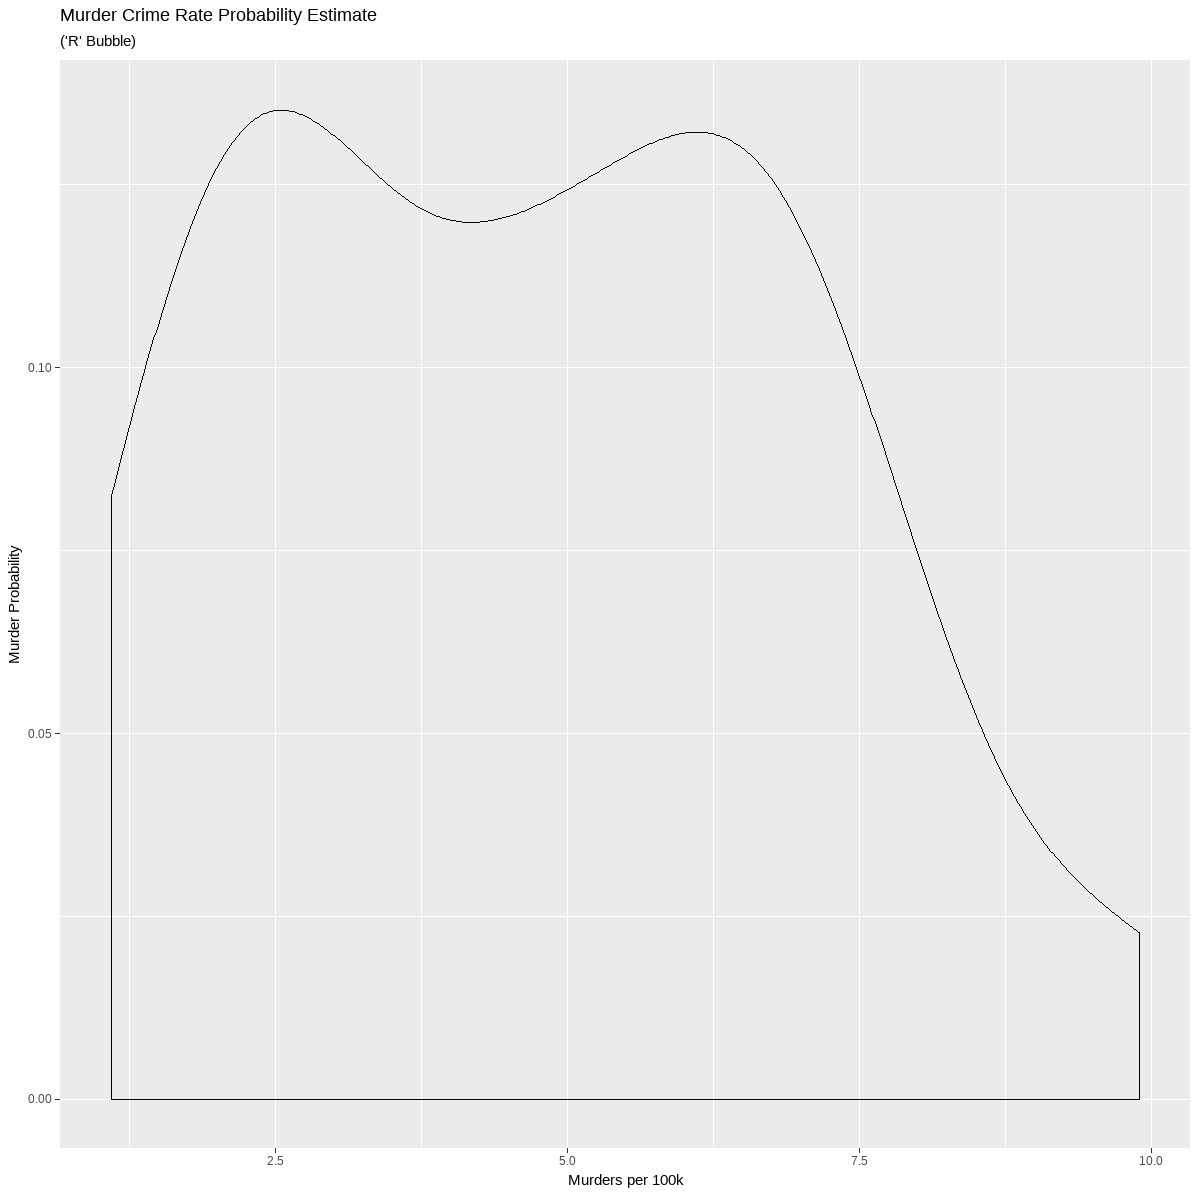

In [176]:
p <- ggplot(plot_df, aes(murder)) +
  geom_density(aes(colour = murder))+
 labs(
        title="Murder Crime Rate Probability Estimate",
        subtitle="('R' Bubble)",
        x="Murders per 100k",
        y="Murder Probability"
    )
p

jpeg("output_wk07_08_r_kde.jpg")
print(p)

dev.off()